### Read the doctor review dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path = "/Users/chongchen/Desktop/19Fall RA/raw data/"
doc_review = pd.read_csv(path + 'docs_before.csv', index_col = 0)
gender = pd.read_csv(path + 'genders.csv').drop_duplicates()
doc_review = pd.merge(doc_review,gender,on='hp_id',how='inner')

Number of records and number of columns

In [7]:
doc_review.shape

(134973, 44)

Column Names

In [8]:
doc_review.columns

Index(['hp_id', 'ratemds_id', 'order_id', 'hasorder', 'review_count',
       'avg_help', 'avg_know', 'avg_punct', 'avg_staff', 'var_help',
       'var_know', 'var_punct', 'var_staff', 'rem_neg_DONOTUSE',
       'rem_pos_DONOTUSE', 'ones', 'twos', 'threes', 'fours', 'fives',
       'prop_ones', 'prop_twos', 'prop_threes', 'prop_fours', 'prop_fives',
       'review_corpus', 'spec_comb', 'gy_comb', 'HP_ST', 'firstorderdate',
       'action_desc_concat', 'action_comment_concat', 'orderbasesconcat',
       'cat_nonprej', 'cat_otherprej', 'cat_restrictlicense',
       'cat_losslicense', 'cem_strata_alldocs', 'basecat_badmed',
       'basecat_impaired', 'basecat_finances', 'basecat_criminal',
       'basecat_patient', 'gender'],
      dtype='object')

In [3]:
doc_review['hasorder'] = doc_review['hasorder'].map(lambda x: str(x))

In [4]:
doc_review['hasorder'].value_counts()

0    133600
1      1373
Name: hasorder, dtype: int64

1371 out of 133600 doctors have received sanctions.

In [5]:
def no_space(x):
    a = x.split(' ')
    b = ''
    for i in a:
        if i != '':
            b = b+i
    return b
doc_review['spec_comb'] = doc_review['spec_comb'].map(lambda x:no_space(x))

In [6]:
doc_review['spec_comb'][2]

'InternalMedicine'

### Let's focus on the doctors who has speciality of 'Internal Medicine' first.

In [7]:
review = doc_review[['hp_id','review_corpus']][doc_review['spec_comb']=='InternalMedicine']

In [8]:
review.shape

(33549, 2)

In [9]:
review.reset_index(inplace = True, drop = True)

In [10]:
review

,hp_id,review_corpus
0,19713,"satisfactory but would not recommend coldness,..."
1,587845,I have been going to Dr. Mittleman for the pas...
2,1026482,What I like most about Dr. Brandies is that sh...
3,356796,I have been a patient for 5+ years. She always...
4,1444150,Dr. Kloosterman was so kind and knowledgable! ...
5,1298609,I no longer use this doctor he doesn't have ti...
6,48453,This doctor brushed aside everything I said wh...
7,1128956,"good for pulmonary disease, but definitely not..."
8,912294,"So, the first thing this idiot does is argue w..."
9,1529842,Deceased


## Convert the review corpus into a list of sentences

In [11]:
review['sentence']= review['review_corpus'].map(lambda x: x.split('|'))

## Create a function to generate a new dataframe of doc's review by seperating review corpus

In [12]:
review_df = pd.DataFrame()
for i, sentence in enumerate(review['sentence']):
    temp_dict = dict(enumerate(sentence))
    a = len(list(temp_dict.keys()))
    s = str(review['hp_id'][i])
    temp_df = pd.DataFrame.from_dict(data = temp_dict, orient = 'index', columns=['Review'])
    temp_df['hp_id'] = [s for i in range(a)]
    review_df = review_df.append(temp_df, ignore_index=True)

The new dataframe with each review in a single cell.

### Output

In [19]:
review_df

,Review,hp_id
0,"satisfactory but would not recommend coldness,...",19713
1,Although Dr. Merlo does not appear to have an...,19713
2,"took my daughter for problems, never examined...",19713
3,"Yes, Dr. Merlot can be rude and arrogant, but...",19713
4,I called to make and appointment and a woman ...,19713
5,"I, unfortunately,treated with Dr.Merlo severa...",19713
6,I can't tell you if she's a good or bad docto...,19713
7,Yesterday my partner had an upper endoscopy d...,19713
8,Very arrogant and rude. Went in with a previo...,19713
9,She files insurance for me even though I have...,19713


## Further split each sentence into a list of words

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
review_df['word'] = review_df['Review'].map(lambda sentence: word_tokenize(sentence))

In [22]:
print(review_df['Review'][0])

satisfactory but would not recommend coldness, solo, no helpfulness, limited to no office staff, isolation, diagnosis is solo 


In [23]:
print(review_df['word'][0])

['satisfactory', 'but', 'would', 'not', 'recommend', 'coldness', ',', 'solo', ',', 'no', 'helpfulness', ',', 'limited', 'to', 'no', 'office', 'staff', ',', 'isolation', ',', 'diagnosis', 'is', 'solo']


## Lemmatize with POS Tag

reference : https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [166]:
import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

In [167]:
# review_df['word_pos_tag'] = review_df['word'].map(lambda x: pos_tag(x))

In [168]:
#print(review_df['word_pos_tag'][0])

[('satisfactory', 'NN'), ('but', 'CC'), ('would', 'MD'), ('not', 'RB'), ('recommend', 'VB'), ('coldness', 'NN'), (',', ','), ('solo', 'NN'), (',', ','), ('no', 'DT'), ('helpfulness', 'NN'), (',', ','), ('limited', 'VBD'), ('to', 'TO'), ('no', 'DT'), ('office', 'NN'), ('staff', 'NN'), (',', ','), ('isolation', 'NN'), (',', ','), ('diagnosis', 'NN'), ('is', 'VBZ'), ('solo', 'JJ')]


In [169]:
# def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = word.upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [170]:
# 1. Init Lemmatizer
#lemmatizer = WordNetLemmatizer()

In [171]:
#review_df['lemmatize_word'] = review_df['word_pos_tag'].map(lambda x: [lemmatizer.lemmatize(word_tuple[0], get_wordnet_pos(word_tuple[1])) if word_tuple[0] not in [',','.'] else word_tuple[0] for word_tuple in x])

In [172]:
#print(review_df['lemmatize_word'][0])

['satisfactory', 'but', 'would', 'not', 'recommend', 'coldness', ',', 'solo', ',', 'no', 'helpfulness', ',', 'limited', 'to', 'no', 'office', 'staff', ',', 'isolation', ',', 'diagnosis', 'is', 'solo']


In [173]:
#word = 'caring'
#print(lemmatizer.lemmatize(word))
#print(lemmatizer.lemmatize(word,'v'))

caring
care


In [24]:
review_df

,Review,hp_id,word
0,"satisfactory but would not recommend coldness,...",19713,"[satisfactory, but, would, not, recommend, col..."
1,Although Dr. Merlo does not appear to have an...,19713,"[Although, Dr., Merlo, does, not, appear, to, ..."
2,"took my daughter for problems, never examined...",19713,"[took, my, daughter, for, problems, ,, never, ..."
3,"Yes, Dr. Merlot can be rude and arrogant, but...",19713,"[Yes, ,, Dr., Merlot, can, be, rude, and, arro..."
4,I called to make and appointment and a woman ...,19713,"[I, called, to, make, and, appointment, and, a..."
5,"I, unfortunately,treated with Dr.Merlo severa...",19713,"[I, ,, unfortunately, ,, treated, with, Dr.Mer..."
6,I can't tell you if she's a good or bad docto...,19713,"[I, ca, n't, tell, you, if, she, 's, a, good, ..."
7,Yesterday my partner had an upper endoscopy d...,19713,"[Yesterday, my, partner, had, an, upper, endos..."
8,Very arrogant and rude. Went in with a previo...,19713,"[Very, arrogant, and, rude, ., Went, in, with,..."
9,She files insurance for me even though I have...,19713,"[She, files, insurance, for, me, even, though,..."


### Read NRC-Emotional Lexicon

In [21]:
list_e = [line.split('\t') for line in open('/Users/chongchen/Desktop/19Fall RA/NRC-Sentiment-Emotion-Lexicons/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')]

In [26]:
for i in list_e[:10]:
    i[2] = i[2].strip('\n')
    print(i)

['aback', 'anger', '0']
['aback', 'anticipation', '0']
['aback', 'disgust', '0']
['aback', 'fear', '0']
['aback', 'joy', '0']
['aback', 'negative', '0']
['aback', 'positive', '0']
['aback', 'sadness', '0']
['aback', 'surprise', '0']
['aback', 'trust', '0']


#### Generate the nrc emotional lexicon dictionary

In [41]:
nrc_dict = {}
for i in list_e:
    if i[0] not in nrc_dict.keys():
               nrc_dict[i[0]] = {i[1]:int(i[2].strip('\n'))}
    elif i[0] in nrc_dict.keys():
               nrc_dict[i[0]][i[1]] = int(i[2].strip('\n'))

In [42]:
nrc_dict

{'aback': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 0,
  'joy': 0,
  'negative': 0,
  'positive': 0,
  'sadness': 0,
  'surprise': 0,
  'trust': 0},
 'abacus': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 0,
  'joy': 0,
  'negative': 0,
  'positive': 0,
  'sadness': 0,
  'surprise': 0,
  'trust': 1},
 'abandon': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 1,
  'joy': 0,
  'negative': 1,
  'positive': 0,
  'sadness': 1,
  'surprise': 0,
  'trust': 0},
 'abandoned': {'anger': 1,
  'anticipation': 0,
  'disgust': 0,
  'fear': 1,
  'joy': 0,
  'negative': 1,
  'positive': 0,
  'sadness': 1,
  'surprise': 0,
  'trust': 0},
 'abandonment': {'anger': 1,
  'anticipation': 0,
  'disgust': 0,
  'fear': 1,
  'joy': 0,
  'negative': 1,
  'positive': 0,
  'sadness': 1,
  'surprise': 1,
  'trust': 0},
 'abate': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 0,
  'joy': 0,
  'negative': 0,
  'positive': 0,
  'sadness': 0,
  'surprise': 0,


### Read the AFINN dictionary

In [25]:
list_a = [line.split('\t') for line in open("/Users/chongchen/Desktop/19Fall RA/AFINN/AFINN-111.txt")]

In [26]:
afinn = dict(map(lambda x : [x[0],int(x[1])], list_a))

In [27]:
afinn

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [28]:
afinn["Good".lower()]

3

For example, the sentiment score of 'good' is 3.

In [29]:
sum(map(lambda word: afinn.get(word, 0), "Rainy day but still in a good mood".lower().split()))

2

The sentiment score of "Rainy day but still in a good mood" is 2 based on AFINN dictionary.

### Caculate the sentiment score of each review

Sentiment score = total score / number of words contribute to the total score. Since the more words, the higher the score will be, this average score try to eliminate the effect of long comments.

In [30]:
# calculate the score of each comment
review_df['score'] = review_df['word'].map(lambda x: sum(afinn.get(word, 0) for word in x) )

In [31]:
# define a function to calcualte the average score
def avg_score(sentence):
    num = 0
    score = 0
    for word in sentence:
        s = afinn.get(word, 0)
        score = score+s
        if s != 0:
            num = num+1
    if num == 0:
        final_score = 0
    else:
        final_score = score/num
    return final_score

In [32]:
# calculate the average score of each comment
review_df['avg_score'] = review_df['word'].map(lambda x: avg_score(x))

In [33]:
review_df.sort_values(by=['avg_score','score'], axis=0, ascending = False, inplace = True)

In [34]:
review_df.reset_index(drop = True, inplace = True)
review_df

,Review,hp_id,word,score,avg_score
0,A superb internist who is exceedingly knowledg...,96079,"[A, superb, internist, who, is, exceedingly, k...",10,5.000000
1,superb,1406694,[superb],5,5.000000
2,"Caring, patient and thorough. Always follows u...",118476,"[Caring, ,, patient, and, thorough, ., Always,...",5,5.000000
3,"outstanding bedside maners,takes time with pat...",7693,"[outstanding, bedside, maners, ,, takes, time,...",5,5.000000
4,outstanding,508105,[outstanding],5,5.000000
5,In the four years I have been a patient he ha...,1406399,"[In, the, four, years, I, have, been, a, patie...",5,5.000000
6,"Dr. Knuths is probably a decent doctor, but h...",566762,"[Dr., Knuths, is, probably, a, decent, doctor,...",5,5.000000
7,outstanding physician!,515951,"[outstanding, physician, !]",5,5.000000
8,Dr.Angov is the BEST! I was thrilled to find a...,842019,"[Dr.Angov, is, the, BEST, !, I, was, thrilled,...",5,5.000000
9,outstanding knowledge and compassion,1192927,"[outstanding, knowledge, and, compassion]",5,5.000000


In [36]:
print(review_df['Review'][0],'\n')
print('Total Score: ',review_df['score'][0],'\n' )
print('Average Score: ',review_df['avg_score'][0],'\n' )

A superb internist who is exceedingly knowledgeable and caring for his patients. His office staff and medical assistant are also superb.  

Total Score:  10 

Average Score:  5.0 



### Statistic of Score

* Total Score

In [37]:
review_df['score'].describe()

count    89661.000000
mean         2.895819
std          5.390650
min        -51.000000
25%          0.000000
50%          2.000000
75%          6.000000
max         48.000000
Name: score, dtype: float64

* Average Score

In [38]:
review_df['avg_score'].describe()

count    89661.000000
mean         0.942326
std          1.447972
min         -4.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: avg_score, dtype: float64

### Let's look at the following ramdom selected 10 sentences to see the accuracy of the results

In [39]:
from numpy.random import randint

In [40]:
nums = randint(0,89661,10)

In [41]:
for i in randint(0,89661,10):
    print('\n', 'No.',i+1)
    print('Content: ',review_df['Review'][i],'\n')
    print('Total Score: ', review_df['score'][i])
    print('Average Score: ', review_df['avg_score'][i], '\n')


 No. 78460
Content:   Left me unclothed waiting for exam for 40+ minutes and said she had an emergency. During exam argued that I didn't have a bone spur, but didn't order any tests to see what was causing the pain along my spine. She was very expensive for lousy care.  

Total Score:  -2
Average Score:  -0.6666666666666666 


 No. 17593
Content:  While I had to wait a while to see her, it was worth the wait. She took time to listen to me and was very knowledgable. I felt more at ease when I left the office. Get an early morning appointment. She's a great doctor.  

Total Score:  7
Average Score:  2.3333333333333335 


 No. 63233
Content:   VERY KNOWLEDGABLE, UNDERSTAND HIS PATIENT NEEDS.  

Total Score:  0
Average Score:  0.0 


 No. 45807
Content:  Dr. Sharp has unusually good communication skills. Reponds to e-mail in detail. He is up-to-date on research and an extaordinary physician. He is currently part-time in the Stanford Medical Group which limits access  

Total Score:  2
Ave

### Add Gender information to the current data

In [42]:
gender['hp_id'] = gender['hp_id'].map(lambda x: str(x))

In [43]:
review_df = pd.merge(review_df, gender, on='hp_id', how = 'left')

In [44]:
review_df.head()

,Review,hp_id,word,score,avg_score,gender
0,A superb internist who is exceedingly knowledg...,96079,"[A, superb, internist, who, is, exceedingly, k...",10,5.0,M
1,superb,1406694,[superb],5,5.0,M
2,"Caring, patient and thorough. Always follows u...",118476,"[Caring, ,, patient, and, thorough, ., Always,...",5,5.0,M
3,"outstanding bedside maners,takes time with pat...",7693,"[outstanding, bedside, maners, ,, takes, time,...",5,5.0,M
4,outstanding,508105,[outstanding],5,5.0,M


### Some statistics of sentiment score

Statistics of male doctors total sentiment score

In [45]:
review_df['score'][review_df['gender']=='M'].describe()

count    63281.000000
mean         2.902704
std          5.332770
min        -50.000000
25%          0.000000
50%          2.000000
75%          6.000000
max         48.000000
Name: score, dtype: float64

Statistics of female doctors total sentiment score

In [46]:
review_df['score'][review_df['gender']=='F'].describe()

count    26380.000000
mean         2.879303
std          5.527093
min        -51.000000
25%          0.000000
50%          2.000000
75%          6.000000
max         40.000000
Name: score, dtype: float64

Statistics of male doctors average sentiment score

In [47]:
review_df['avg_score'][review_df['gender']=='M'].describe()

count    63281.000000
mean         0.955238
std          1.448134
min         -4.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: avg_score, dtype: float64

Statistics of female doctors average sentiment score

In [48]:
review_df['avg_score'][review_df['gender']=='F'].describe()

count    26380.000000
mean         0.911354
std          1.447143
min         -4.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: avg_score, dtype: float64

### Comparing distribution of total sentiment score between gender

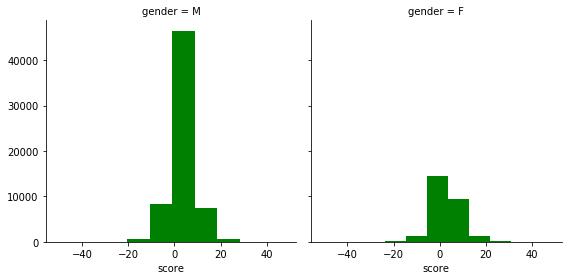

In [49]:
g=sns.FacetGrid(review_df, col='gender',sharex=True, height=4)
g.map(plt.hist, 'score', color ='green');

### Comparing distribution of average sentiment score between gender

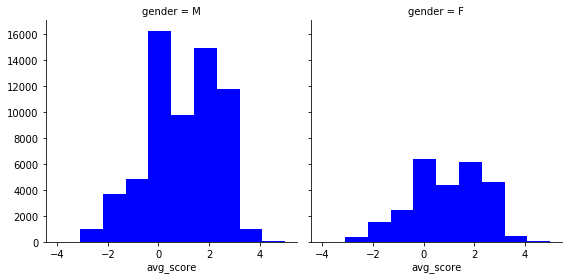

In [50]:
g=sns.FacetGrid(review_df, col='gender',sharex=True, height=4)
g.map(plt.hist, 'avg_score', color ='blue');

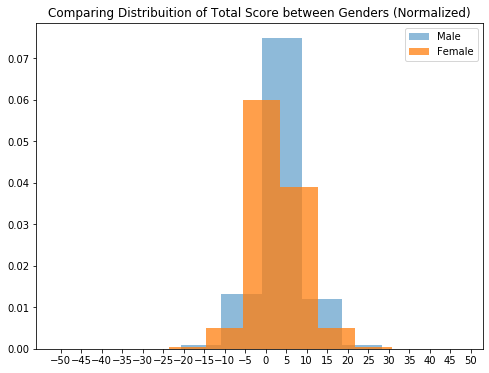

In [51]:
plt.figure(figsize=(8,6));
plt.hist(review_df['score'][review_df['gender']=='M'], label = 'Male', density= True, alpha = 0.5);
plt.hist(review_df['score'][review_df['gender']=='F'], label = 'Female', density = True, alpha = 0.75);
plt.legend();
plt.xticks(np.arange(-50,51,5));
plt.title('Comparing Distribuition of Total Score between Genders (Normalized)', fontsize = 12, loc = 'center');

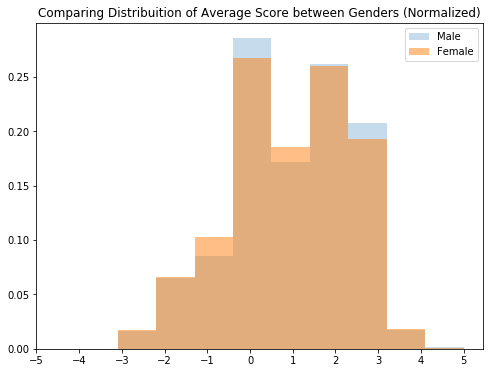

In [52]:
plt.figure(figsize=(8,6));
plt.hist(review_df['avg_score'][review_df['gender']=='M'], label = 'Male', density= True, alpha = 0.25);
plt.hist(review_df['avg_score'][review_df['gender']=='F'], label = 'Female', density = True, alpha = 0.5);
plt.legend();
plt.xticks(np.arange(-5,6,1));
plt.title('Comparing Distribuition of Average Score between Genders (Normalized)', fontsize = 12, loc = 'center');

In [53]:
doc_review['hp_id'] = doc_review['hp_id'].map(lambda x: str(x))

In [54]:
sanction = doc_review[['hp_id','hasorder']]

In [55]:
review_df = pd.merge(review_df,sanction, on = 'hp_id', how = 'left')

### Calculate the average score of each doctor

Average Score = sum(avg_score per review)/(num of reviews with score higher than 0)

In [56]:
score_df = review_df.groupby(by=['hp_id'])['avg_score'].sum()

In [57]:
score_df2 = review_df.groupby(by=['hp_id'])['Review'].count()

In [58]:
score_df3 = review_df[review_df['score']!=0].groupby(by=['hp_id'])['Review'].count()

In [59]:
score_df = pd.merge(score_df, score_df2, on='hp_id', how = 'inner')

In [60]:
score_df = pd.merge(score_df, score_df3, on='hp_id', how = 'left')

In [61]:
score_df = pd.merge(score_df, doc_review[['hp_id','gender','hasorder']], on='hp_id')

In [62]:
score_df.rename(mapper={'Review_x':'Total_num of Reviews', 'Review_y':'Total_num of reviews used', 'avg_score':'total_avg_score'}, axis=1, inplace = True)

In [63]:
score_df.head()

,hp_id,total_avg_score,Total_num of Reviews,Total_num of reviews used,gender,hasorder
0,1000133,2.000,1,1.0,M,0
1,1000546,9.500,4,4.0,M,0
2,1000697,0.000,1,NaN,M,0
3,1000755,2.125,2,2.0,F,0
4,1000776,3.000,1,1.0,M,0


In [64]:
score_df['avg_score'] = score_df['total_avg_score']/score_df['Total_num of reviews used']

In [65]:
score_df.head()

,hp_id,total_avg_score,Total_num of Reviews,Total_num of reviews used,gender,hasorder,avg_score
0,1000133,2.000,1,1.0,M,0,2.0000
1,1000546,9.500,4,4.0,M,0,2.3750
2,1000697,0.000,1,NaN,M,0,NaN
3,1000755,2.125,2,2.0,F,0,1.0625
4,1000776,3.000,1,1.0,M,0,3.0000


Statistics of avg_score of doctors who received sanctions 

In [66]:
score_df['avg_score'][score_df['hasorder']=='1'].describe()

count    174.000000
mean       1.044405
std        1.364545
min       -2.500000
25%        0.229167
50%        1.171429
75%        2.000000
max        3.500000
Name: avg_score, dtype: float64

Statistics of avg_score of doctors who never receive sanctions 

In [67]:
score_df['avg_score'][score_df['hasorder']=='0'].describe()

count    28462.000000
mean         1.246865
std          1.294777
min         -4.000000
25%          0.500000
50%          1.500000
75%          2.094338
max          5.000000
Name: avg_score, dtype: float64

Statistics of avg_score of male doctors

In [68]:
score_df['avg_score'][score_df['gender']=='M'].describe()

count    20706.000000
mean         1.258088
std          1.303689
min         -4.000000
25%          0.500000
50%          1.500000
75%          2.125000
max          5.000000
Name: avg_score, dtype: float64

Statistics of avg_score of female doctors

In [69]:
score_df['avg_score'][score_df['gender']=='F'].describe()

count    7930.000000
mean        1.213116
std         1.272580
min        -4.000000
25%         0.500000
50%         1.427904
75%         2.000000
max         5.000000
Name: avg_score, dtype: float64

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


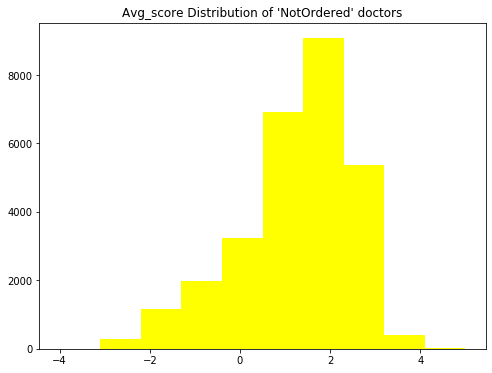

In [70]:
plt.figure(figsize= (8,6))
plt.hist(score_df['avg_score'][score_df['hasorder']=='0'], label = 'No sanction', color = 'yellow');
# sns.distplot(score_df['score'][score_df['hasorder']==0],hist = True, kde=False,rug=True);
# plt.xticks(np.arange(-100,400,50));
plt.title('Avg_score Distribution of \'NotOrdered\' doctors', fontsize = 12, loc = 'center');

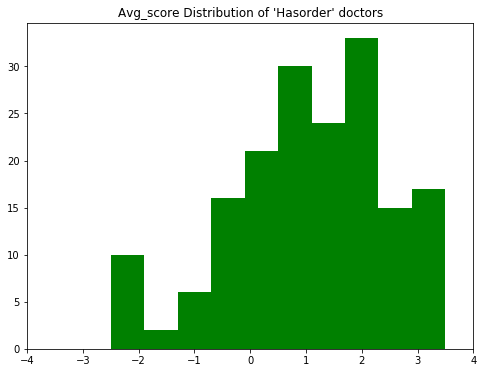

In [71]:
plt.figure(figsize= (8,6))
plt.hist(score_df['avg_score'][score_df['hasorder']=='1'], label = 'Has sanction',color = 'green');
plt.title('Avg_score Distribution of \'Hasorder\' doctors', fontsize = 12, loc = 'center');
plt.xticks(np.arange(-4,5,1));

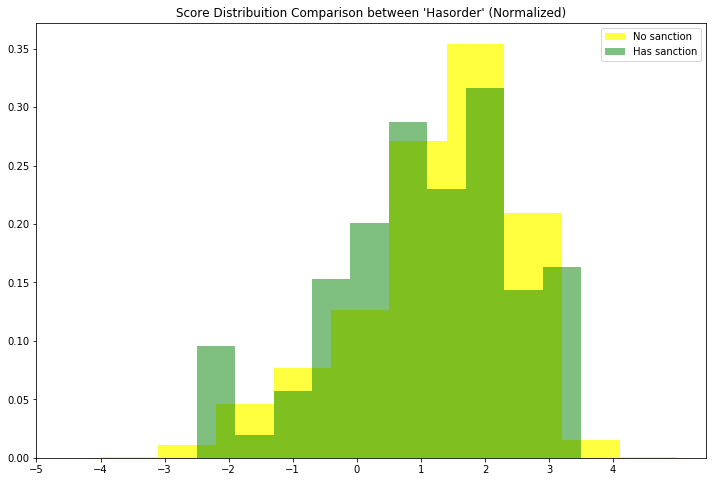

In [72]:
plt.figure(figsize=(12,8));
plt.hist(score_df['avg_score'][score_df['hasorder']=='0'], label = 'No sanction', color = 'yellow', density=True,alpha=0.75);
plt.hist(score_df['avg_score'][score_df['hasorder']=='1'], label = 'Has sanction', color = 'green', density=True, alpha=0.5);
plt.legend();
plt.xticks(np.arange(-5,5,1));
plt.title('Score Distribuition Comparison between \'Hasorder\' (Normalized)', fontsize = 12, loc = 'center');

In [73]:
score_df['hasorder'] = score_df['hasorder'].map(lambda x: str(x))

### Normalized distribution of average score comparison between 'hasorder' and 'gender

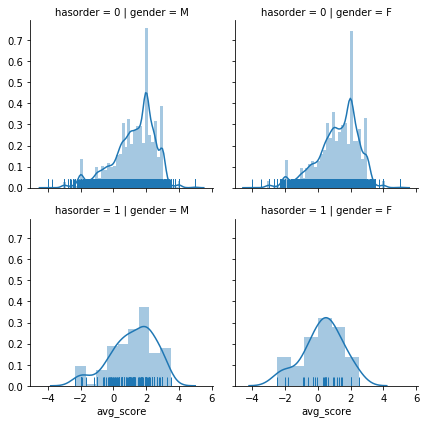

In [74]:
g2 = sns.FacetGrid(score_df, row='hasorder', col='gender',sharex=True)
g2.map(sns.distplot, 'avg_score', rug=True);

In [75]:
df3 = pd.crosstab(index = score_df.gender, columns = score_df.hasorder)
df3['percentage'] = df3['1']/df3['0']

In [76]:
df3

hasorder,0,1,percentage
gender,,,
F,9056,31,0.003423
M,24286,176,0.007247


## Run LDA on top 10% positive male doctor reviews 

In [120]:
lda_positive = review_df.loc[:8966,['word','avg_score','gender']]

In [121]:
lda_male = lda_positive[lda_positive['gender']=='M'][lda_positive['avg_score']> 0.0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [122]:
lda_male

,word,avg_score,gender
0,"[A, superb, internist, who, is, exceedingly, k...",5.000000,M
1,[superb],5.000000,M
2,"[Caring, ,, patient, and, thorough, ., Always,...",5.000000,M
3,"[outstanding, bedside, maners, ,, takes, time,...",5.000000,M
4,[outstanding],5.000000,M
5,"[In, the, four, years, I, have, been, a, patie...",5.000000,M
6,"[Dr., Knuths, is, probably, a, decent, doctor,...",5.000000,M
9,"[outstanding, knowledge, and, compassion]",5.000000,M
10,"[Clinically, superb, !]",5.000000,M
11,"[superb, physician]",5.000000,M


### Remove stop words

In [123]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'Dr.', 'dr','Doctor', 'doctor','bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [124]:
lda_male['word'] = lda_male['word'].map(lambda x: [i.lower() for i in x if i.isalpha() and i.lower() not in my_stopwords and len(i) >1])

In [125]:
### Prepare bi-grams and tri-grams¶
# Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.
# reference: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

tokens = lda_male['word'].tolist()
bigram = gensim.models.Phrases(tokens)
trigram = gensim.models.Phrases(bigram[tokens], min_count = 1)
tokens = list(trigram[bigram[tokens]])

### Create the Dictionary and Corpus needed for Topic Modeling

In [126]:
# Create Dictionary
dictionary_lda = corpora.Dictionary(tokens)
dictionary_lda.filter_extremes(no_below=3)

# Term Document Frequency
corpus = [dictionary_lda.doc2bow(token) for token in tokens]

# Human readable format of corpus (term-frequency)
[[(dictionary_lda[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('caring', 1),
  ('internist', 1),
  ('knowledgeable', 1),
  ('medical_assistant', 1),
  ('office_staff', 1),
  ('patients', 1),
  ('superb', 2)]]

### Build LDA Model

In [127]:
# Build LDA model
np.random.seed(123456)
lda_model = gensim.models.ldamodel.LdaModel(corpus,num_topics = 2, id2word = dictionary_lda, passes = 6, alpha='auto',eta=[0.01]*len(dictionary_lda.keys()))

### Topic results

In [128]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.051*"good" + 0.037*"excellent" + 0.026*"always" + 0.019*"physician" + '
  '0.016*"time" + 0.015*"patient" + 0.013*"caring" + 0.013*"knowledgeable" + '
  '0.010*"great" + 0.008*"wonderful"'),
 (1,
  '0.048*"great" + 0.035*"best" + 0.029*"wonderful" + 0.027*"staff" + '
  '0.016*"caring" + 0.014*"nice" + 0.014*"patients" + 0.011*"care" + '
  '0.010*"patient" + 0.010*"knowledgeable"')]


## Run LDA on top 10% positive female doctor reviews 

In [129]:
lda_female = lda_positive[lda_positive['gender']=='F'][lda_positive['avg_score']> 0.0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [130]:
# Remove stop words
lda_female['word'] = lda_female['word'].map(lambda x: [i.lower() for i in x if i.isalpha() and i.lower() not in my_stopwords and len(i) >1])

### Prepare bi-grams and tri-grams¶
# Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.
# reference: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

tokens = lda_female['word'].tolist()
bigram = gensim.models.Phrases(tokens)
trigram = gensim.models.Phrases(bigram[tokens], min_count = 1)
tokens = list(trigram[bigram[tokens]])

# Create Dictionary
dictionary_lda = corpora.Dictionary(tokens)
dictionary_lda.filter_extremes(no_below=3)

# Term Document Frequency
corpus = [dictionary_lda.doc2bow(token) for token in tokens]

# Build LDA model
np.random.seed(123456)
lda_model = gensim.models.ldamodel.LdaModel(corpus,num_topics = 2, id2word = dictionary_lda, passes = 6, alpha='auto',eta=[0.01]*len(dictionary_lda.keys()))

# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.039*"good" + 0.034*"wonderful" + 0.023*"staff" + 0.019*"caring" + '
  '0.018*"great" + 0.017*"office" + 0.014*"always" + 0.012*"nice" + '
  '0.011*"patient" + 0.011*"time"'),
 (1,
  '0.035*"best" + 0.034*"great" + 0.025*"excellent" + 0.021*"patients" + '
  '0.019*"love" + 0.016*"caring" + 0.014*"patient" + 0.013*"physician" + '
  '0.012*"years" + 0.012*"always"')]


## Run LDA on top 10% negative male doctor reviews 

In [131]:
lda_negative = review_df.iloc[-8966:,:][['word','avg_score','gender']]

In [132]:
lda_male_n = lda_negative[lda_negative['gender']=='M'][lda_negative['avg_score'] < 0.0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [133]:
# Remove stop words
lda_male_n['word'] = lda_male_n['word'].map(lambda x: [i.lower() for i in x if i.isalpha() and i.lower() not in my_stopwords and len(i) >1])

### Prepare bi-grams and tri-grams¶
# Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.
# reference: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

tokens = lda_male_n['word'].tolist()
bigram = gensim.models.Phrases(tokens)
trigram = gensim.models.Phrases(bigram[tokens], min_count = 1)
tokens = list(trigram[bigram[tokens]])

# Create Dictionary
dictionary_lda = corpora.Dictionary(tokens)
dictionary_lda.filter_extremes(no_below=3)

# Term Document Frequency
corpus = [dictionary_lda.doc2bow(token) for token in tokens]

# Build LDA model
np.random.seed(123456)
lda_model = gensim.models.ldamodel.LdaModel(corpus,num_topics = 2, id2word = dictionary_lda, passes = 6, alpha='auto',eta=[0.01]*len(dictionary_lda.keys()))

# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.015*"rude" + 0.014*"staff" + 0.012*"patient" + 0.012*"patients" + '
  '0.009*"never" + 0.008*"time" + 0.006*"terrible" + 0.006*"even" + '
  '0.005*"found" + 0.005*"office"'),
 (1,
  '0.016*"office" + 0.014*"told" + 0.010*"said" + 0.010*"never" + '
  '0.009*"staff" + 0.007*"time" + 0.007*"bad" + 0.007*"appointment" + '
  '0.007*"called" + 0.007*"could"')]


## Run LDA on top 10% negative female doctor reviews 

In [134]:
lda_female = lda_negative[lda_negative['gender']=='F'][lda_negative['avg_score'] < 0.0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [135]:
# Remove stop words
lda_female['word'] = lda_female['word'].map(lambda x: [i.lower() for i in x if i.isalpha() and i.lower() not in my_stopwords and len(i) >1])


### Prepare bi-grams and tri-grams¶
# Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.
# reference: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

tokens = lda_female['word'].tolist()
bigram = gensim.models.Phrases(tokens)
trigram = gensim.models.Phrases(bigram[tokens], min_count = 1)
tokens = list(trigram[bigram[tokens]])

# Create Dictionary
dictionary_lda = corpora.Dictionary(tokens)
dictionary_lda.filter_extremes(no_below=3)

# Term Document Frequency
corpus = [dictionary_lda.doc2bow(token) for token in tokens]

# Build LDA model
np.random.seed(123456)
lda_model = gensim.models.ldamodel.LdaModel(corpus,num_topics = 2, id2word = dictionary_lda, passes = 6, alpha='auto',eta=[0.01]*len(dictionary_lda.keys()))

# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.013*"time" + 0.011*"staff" + 0.010*"office" + 0.008*"patients" + '
  '0.008*"patient" + 0.008*"problems" + 0.007*"amp" + 0.007*"could" + '
  '0.005*"doctors" + 0.005*"unprofessional"'),
 (1,
  '0.015*"told" + 0.013*"office" + 0.012*"never" + 0.009*"patient" + '
  '0.008*"rude" + 0.008*"said" + 0.007*"time" + 0.007*"called" + 0.007*"back" '
  '+ 0.007*"staff"')]


## Run LDA on top 10% positive doctor reviews 

In [136]:
# Remove stop words
lda_positive['word'] = lda_positive['word'].map(lambda x: [i.lower() for i in x if i.isalpha() and i.lower() not in my_stopwords and len(i) >1])


### Prepare bi-grams and tri-grams¶
# Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.
# reference: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

tokens = lda_positive['word'].tolist()
bigram = gensim.models.Phrases(tokens)
trigram = gensim.models.Phrases(bigram[tokens], min_count = 1)
tokens = list(trigram[bigram[tokens]])

# Create Dictionary
dictionary_lda = corpora.Dictionary(tokens)
dictionary_lda.filter_extremes(no_below=3)

# Term Document Frequency
corpus = [dictionary_lda.doc2bow(token) for token in tokens]

# Build LDA model
np.random.seed(123456)
lda_model = gensim.models.ldamodel.LdaModel(corpus,num_topics = 2, id2word = dictionary_lda, passes = 6, alpha='auto',eta=[0.01]*len(dictionary_lda.keys()))

# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.052*"great" + 0.038*"good" + 0.026*"excellent" + 0.023*"wonderful" + '
  '0.023*"best" + 0.021*"staff" + 0.020*"patient" + 0.020*"always" + '
  '0.018*"knowledgeable" + 0.016*"nice"'),
 (1,
  '0.022*"best" + 0.020*"caring" + 0.019*"patients" + 0.017*"physician" + '
  '0.017*"wonderful" + 0.013*"good" + 0.012*"doctors" + 0.010*"staff" + '
  '0.009*"thorough" + 0.009*"office"')]


## Run LDA on top 10% negative doctor reviews 

In [137]:
# Remove stop words
lda_negative['word'] = lda_negative['word'].map(lambda x: [i.lower() for i in x if i.isalpha() and i.lower() not in my_stopwords and len(i) >1])


### Prepare bi-grams and tri-grams¶
# Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.
# reference: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

tokens = lda_negative['word'].tolist()
bigram = gensim.models.Phrases(tokens)
trigram = gensim.models.Phrases(bigram[tokens], min_count = 1)
tokens = list(trigram[bigram[tokens]])

# Create Dictionary
dictionary_lda = corpora.Dictionary(tokens)
dictionary_lda.filter_extremes(no_below=3)

# Term Document Frequency
corpus = [dictionary_lda.doc2bow(token) for token in tokens]

# Build LDA model
np.random.seed(123456)
lda_model = gensim.models.ldamodel.LdaModel(corpus,num_topics = 2, id2word = dictionary_lda, passes = 6, alpha='auto',eta=[0.01]*len(dictionary_lda.keys()))

# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.010*"told" + 0.008*"back" + 0.007*"pain" + 0.007*"amp" + 0.007*"even" + '
  '0.007*"went" + 0.007*"asked" + 0.007*"could" + 0.006*"never" + '
  '0.005*"said"'),
 (1,
  '0.017*"staff" + 0.017*"office" + 0.013*"time" + 0.012*"never" + '
  '0.011*"patient" + 0.010*"told" + 0.009*"patients" + 0.007*"rude" + '
  '0.007*"said" + 0.007*"called"')]
